In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import binary_crossentropy

In [29]:
file = np.load(r"C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\Image_Classification\mnist_compressed.npz")
print(list(file.keys()))

['train_images', 'train_labels', 'test_images', 'test_labels']


In [30]:
X_test, y_test, X_train, y_train =  file['test_images'], file['test_labels'], file['train_images'], file['train_labels']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(len(np.unique(y_train)))

(60000, 28, 56)
(60000,)
(10000, 28, 56)
(10000,)
100


In [31]:
# normalise
X_train = X_train/255.0
X_test = X_test/255.0

# add noise to image
noise_factor = 0.6
X_train_noisy = np.clip(X_train + noise_factor*np.random.normal(size=X_train.shape), 0.0, 1.0)
X_test_noisy = np.clip(X_test + noise_factor*np.random.normal(size=X_test.shape), 0.0, 1.0)

X_train[:1000]
X_test[:100]

X_train_noisy[:1000]
X_test_noisy[:100]


array([[[0.1900052 , 0.61524999, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.11336848, 0.5843219 , 0.        , ..., 0.        ,
         0.        , 0.41114147],
        [0.        , 0.        , 0.11390511, ..., 1.        ,
         0.        , 0.        ],
        ...,
        [0.29538108, 0.        , 1.        , ..., 0.        ,
         0.        , 0.28792631],
        [0.        , 0.        , 0.0906629 , ..., 0.        ,
         1.        , 0.41505055],
        [0.        , 0.31156254, 0.18982207, ..., 0.        ,
         0.        , 0.        ]],

       [[0.22681645, 0.05059725, 0.55064097, ..., 0.        ,
         0.        , 0.        ],
        [0.6002656 , 0.32903845, 0.71642765, ..., 0.44527015,
         0.        , 0.16328358],
        [0.        , 0.90476075, 0.        , ..., 0.13181256,
         0.35768394, 0.26739713],
        ...,
        [0.63156995, 0.56773913, 0.10851781, ..., 0.66448343,
         0.1376597 , 0.36576047],
        [0. 

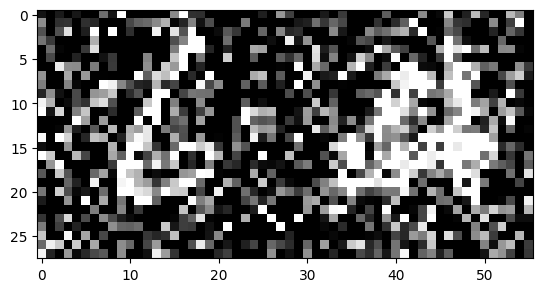

In [32]:
plt.imshow(X_train_noisy[0],cmap="gray")
plt.show()

In [35]:
# create cnn
model = models.Sequential([
    # Encoder
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 56, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    
    # Decoder
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer="adam",
             loss= "binary_crossentropy")

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 28, 56, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 14, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 14, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 7, 14, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 14, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 14, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 28, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 56, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(X_train_noisy, X_train, epochs=5, batch_size=128, validation_data=(X_test_noisy, X_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 220ms/step - loss: 0.2485 - val_loss: 0.1265
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 223ms/step - loss: 0.1245 - val_loss: 0.1177
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 227ms/step - loss: 0.1179 - val_loss: 0.1142
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 101s 215ms/step - loss: 0.1147 - val_loss: 0.1122
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 226ms/step - loss: 0.1127 - val_loss: 0.1109


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


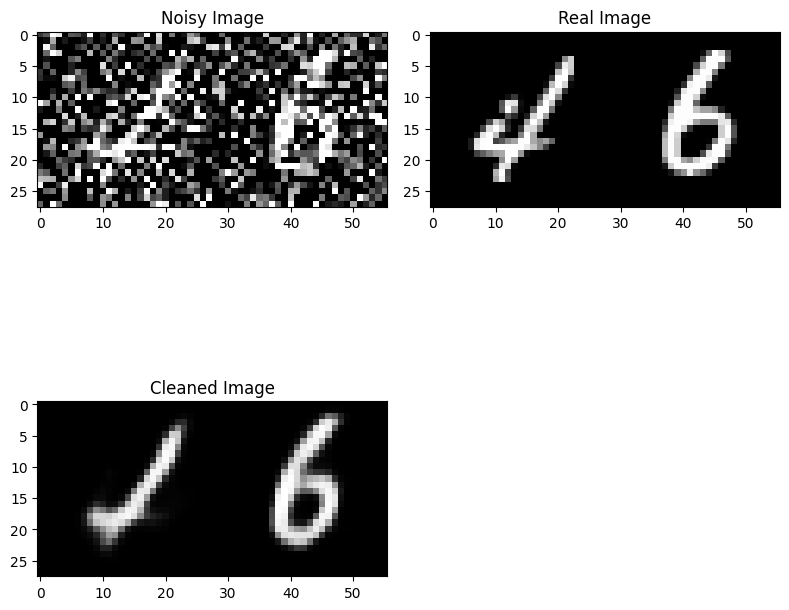

In [39]:
import matplotlib.pyplot as plt

def visualise_results(index):
    noisy_test_img = X_test_noisy[index].reshape(28, 56)  # No need for 3D reshaping for plotting
    real_img = X_test[index].reshape(28, 56)             # No need for 3D reshaping for plotting

    # Predict cleaned image
    pred_real_img = model.predict(X_test_noisy[index:index+1])[0].reshape(28, 56)  # Extract 2D image

    # Plot results
    plt.figure(figsize=(8, 8))
    
    plt.subplot(2, 2, 1)
    plt.title("Noisy Image")
    plt.imshow(noisy_test_img, cmap="gray")
    
    plt.subplot(2, 2, 2)
    plt.title("Real Image")
    plt.imshow(real_img, cmap="gray")
    
    plt.subplot(2, 2, 3)
    plt.title("Cleaned Image")
    plt.imshow(pred_real_img, cmap="gray")
    
    plt.tight_layout()
    plt.show()

visualise_results(14)